In [1]:
import pandas as pd
train= pd.read_csv('korean-hate-speech/labeled/train.tsv' ,sep='\t')
dev= pd.read_csv('korean-hate-speech/labeled/dev.tsv' ,sep='\t')

In [2]:
train

,comments,contain_gender_bias,bias,hate
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False,others,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,False,none,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False,none,hate
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",False,none,none
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,True,gender,hate
...,...,...,...,...
7891,힘내세요~ 응원합니다!!,False,none,none
7892,힘내세요~~삼가 고인의 명복을 빕니다..,False,none,none
7893,힘내세용 ^^ 항상 응원합니닷 ^^ !,False,none,none
7894,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,False,none,none


# 독립변수 처리

In [2]:
train = train[['comments','hate']]
train['hate'] = train['hate'].map({'none':0,'offensive':1,'hate':2})
dev = dev[['comments','hate']]
dev['hate'] = dev['hate'].map({'none':0,'offensive':1,'hate':2})

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
print('훈련용 리뷰의 개수 :', len(train))
print('테스트용 리뷰의 개수 :', len(dev))

훈련용 리뷰의 개수 : 7896
테스트용 리뷰의 개수 : 471


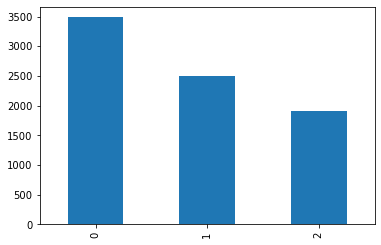

In [5]:
train['hate'].value_counts().plot(kind = 'bar')

# 불용어 제거 후 토큰화 작업

- ( , ) 도 추가
- ....은 의미 있을 수도 있어 제거 X

In [6]:
stopwords = ['(',')','도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '음', '면']

In [7]:
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

train['tokenized'] = train['comments'].apply(mecab.morphs)
train['tokenized'] = train['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
dev['tokenized'] = dev['comments'].apply(mecab.morphs)
dev['tokenized'] = dev['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

# 단어 및 길이 분포 확인

In [8]:
none_words = np.hstack(train[train.hate == 0]['tokenized'].values)
offensive_words = np.hstack(train[train.hate == 1]['tokenized'].values)
hate_words = np.hstack(train[train.hate == 2]['tokenized'].values)

In [9]:
none_words_count = Counter(none_words)
print(none_words_count.most_common(20))

[('.', 2634), ('?', 561), ('거', 431), ('..', 421), ('보', 400), ('있', 391), ('잘', 387), ('좋', 376), ('!', 358), ('는데', 352), ('나', 332), ('안', 320), ('같', 257), ('아', 254), ('너무', 252), ('없', 247), ('겠', 247), ('사람', 237), ('했', 235), ('~', 235)]


In [10]:
offensive_words_count = Counter(offensive_words)
print(offensive_words_count.most_common(20))

[('.', 2080), ('?', 830), ('거', 426), ('..', 351), ('나', 344), ('안', 342), ('있', 287), ('냐', 282), ('보', 275), ('없', 274), ('ㅋㅋ', 259), ('아', 232), ('어', 220), ('는데', 211), ('ㅋㅋㅋ', 211), ('사람', 205), ('여자', 204), ('로', 200), ('왜', 194), ('니', 192)]


In [11]:
hate_words_count = Counter(hate_words)
print(hate_words_count.most_common(20))

[('.', 1456), ('?', 607), ('거', 325), ('ㅋㅋ', 319), ('여자', 298), ('ㅋㅋㅋ', 288), ('냐', 272), ('나', 264), ('안', 244), ('있', 240), ('..', 227), ('보', 223), ('아', 221), ('니', 190), (',', 186), ('어', 176), ('남자', 176), ('없', 174), ('겠', 154), ('같', 153)]


In [12]:
train[train['hate']==1]['tokenized'].map(lambda x: len(x))

8       14
9       22
13      13
15      20
23       9
        ..
7859    53
7862     5
7872     6
7877    13
7882    12
Name: tokenized, Length: 2499, dtype: int64

none 리뷰의 평균 길이 : 13.952094090648307
offensive 리뷰의 평균 길이 : 15.990396158463385
hate 리뷰의 평균 길이 : 18.14965986394558


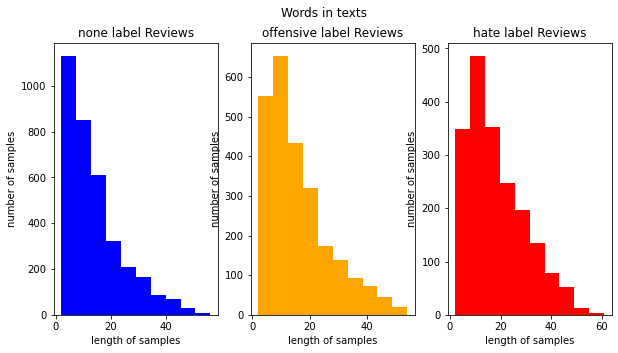

In [13]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
text_len = train[train['hate']==0]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='blue')
ax1.set_title('none label Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('none 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train[train['hate']==1]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='orange')
ax2.set_title('offensive label Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('offensive 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train[train['hate']==2]['tokenized'].map(lambda x: len(x))
ax3.hist(text_len, color='red')
ax3.set_title('hate label Reviews')
fig.suptitle('Words in texts')
ax3.set_xlabel('length of samples')
ax3.set_ylabel('number of samples')
print('hate 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [14]:
train_data, test_data = train_test_split(train, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 5922
테스트용 리뷰의 개수 : 1974


In [15]:
train_data.hate.value_counts()

0    2635
1    1859
2    1428
Name: hate, dtype: int64

In [16]:
test_data.hate.value_counts()

0    851
1    640
2    483
Name: hate, dtype: int64

In [17]:
from tensorflow.keras.utils import to_categorical
dataset_y = to_categorical(train_data['hate'])
dataset_y = np.array(dataset_y, dtype=np.int32)
print(dataset_y)

[[1 0 0]
 [0 0 1]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 1 0]]


In [18]:
test_y = to_categorical(test_data['hate'])
test_y = np.array(test_y, dtype=np.int32)
print(test_y)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 0 1]]


In [19]:
X_train = train_data['tokenized'].values
y_train = dataset_y
X_test= test_data['tokenized'].values
y_test = test_y

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5922,), (5922, 3), (1974,), (1974, 3))

# 정수 인코딩

In [20]:
import gensim
loaded_model = gensim.models.Word2Vec.load("aihub_review_6.model") # 모델 로드


In [21]:
loaded_model.similar_by_word("ㅆㅂ")

<ipython-input-21-cfb6e38cd13b>:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  loaded_model.similar_by_word("ㅆㅂ")


[('시바', 0.8410485982894897),
 ('시발', 0.8202505111694336),
 ('ㅆ발', 0.7903104424476624),
 ('ㅆㅍ', 0.7833770513534546),
 ('아오', 0.782518208026886),
 ('슈바', 0.7626177072525024),
 ('시밤', 0.7533204555511475),
 ('젠장', 0.7490739226341248),
 ('어휴', 0.7402772903442383),
 ('ㅆㅃ', 0.7374851703643799)]

In [34]:
print("단어의 수 : ", len(loaded_model.wv.vocab))
vocab_len = len(loaded_model.wv.vocab)

단어의 수 :  87507


In [22]:
def embedding(word):
    if word in loaded_model.wv.vocab:
        return loaded_model.wv[word]
    else:
        return np.random.normal(size=100)

In [23]:
X_train = [[embedding(word) for word in sentence] for sentence in X_train]

In [24]:
for i in X_train[0]:
    print(i)

[ 0.3205704  -0.29223534  0.28166977  0.19160533  0.25994918 -0.16052312
  0.05649608 -0.24007043  0.5995519  -0.3636819  -0.3441387  -0.02996193
  0.06250454  0.25497457  0.1653577  -0.18234226 -0.03239172 -0.0298142
  0.23375997  0.59823406 -0.0016627   0.2772874  -0.23550123 -0.31420958
  0.15515238 -0.77207947  0.09017662  0.28241655 -0.5808407   0.52307254
 -0.11540357 -0.09884845  0.34062558 -0.35937607 -0.16666664  0.29611918
 -0.20421973  0.23769344  0.02505805  0.30397066  0.21490121  0.13577458
 -0.23035082 -0.04642522 -0.16268203  0.41368815  0.24912463 -0.02056008
  0.03675332 -0.24290226  0.42826453 -0.01529319  0.34062698  0.5212221
 -0.07689518  0.05357447  0.21594955  0.31536388 -0.18403806 -0.4769869
 -0.1996679   0.11920177 -0.10625325  0.50578874  0.02689878  0.08991355
  0.411692    0.4209339  -0.50788397 -0.29566303 -0.01066168  0.21273248
 -0.18241528 -0.28116482  0.14358966 -0.04431742 -0.2796953  -0.22792146
 -0.25466937  0.4047509   0.16238016  0.20823391  0.24

In [25]:
sum(X_train[0]) / len(X_train[0])

array([ 1.27485409e-01,  8.23980290e-03, -1.32144257e-01, -1.31051645e-01,
        1.61492750e-01, -3.98410372e-02,  1.99769754e-02, -4.08526987e-01,
        2.38573626e-01,  9.18339863e-02, -7.69471228e-02,  3.01503632e-02,
        2.76218038e-02,  6.80007413e-02,  1.05558686e-01,  2.79601458e-02,
       -8.63816813e-02, -2.51677409e-02,  1.18635066e-01,  1.69561043e-01,
        6.05299696e-03, -1.78437233e-01, -6.79993853e-02,  3.51231880e-02,
        4.09121662e-02, -3.29676509e-01,  2.06857994e-01,  3.85349631e-01,
       -1.98827043e-01,  1.55974030e-01, -1.16328858e-01,  7.96150640e-02,
       -1.28055438e-01, -1.70631111e-01,  2.72211749e-02,  2.90114284e-01,
        6.96500242e-02,  2.44633555e-01,  8.81979465e-02,  1.34876311e-01,
        6.46285340e-02, -2.83093359e-02, -3.43858689e-01, -5.80019243e-02,
        2.45623246e-01,  3.07061791e-01,  4.39386368e-02,  3.40989679e-01,
        7.81106651e-02,  8.66883099e-02,  2.04399362e-01, -1.61611233e-02,
        8.27188045e-02,  

In [26]:
X_train_mean = [sum(words) / len(words) for words in X_train]

In [61]:
len(X_train_mean)

5922

In [65]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X_train_mean)
X_scaled[0]

array([ 1.60169819, -1.35790627, -2.70309756,  0.62644018, -0.21505753,
        0.37314544,  1.13398024, -2.76249174,  1.39814319, -0.20613727,
        0.21927151,  0.90779403, -0.14288599, -0.86072382,  0.44710582,
       -0.32885719,  0.00382314, -0.54044941,  0.88373813,  0.76845042,
        1.58945724, -1.1435182 ,  0.16304481, -0.28993426, -0.61137473,
       -0.31594875,  0.11641879,  0.69396984, -0.51375132,  0.0170406 ,
       -0.54840373,  0.59054524,  0.30753307, -0.63050704,  1.00998233,
        0.90062594,  1.28733428,  0.31652857,  0.64758138, -0.61745448,
        1.46075494,  0.17881359, -1.99898311, -0.02995837,  1.45511196,
        1.47557797, -0.33405549,  1.32668226,  0.52339134,  0.19178768,
        0.20866723,  0.03756713,  0.51475053,  0.75970625, -0.59429541,
        1.339726  ,  0.79274892,  1.65310402, -0.57647777,  0.61775777,
       -0.97694022,  0.48223161, -0.45398593, -0.62310321,  1.57022712,
       -0.56163683, -0.34074321,  2.73926899,  0.42436562, -0.82

In [27]:
X_test = [[embedding(word) for word in sentence] for sentence in X_test]

In [28]:
X_test_mean = [sum(words) / len(words) for words in X_test]

# 패딩

리뷰의 최대 길이 : 100
리뷰의 평균 길이 : 100.0


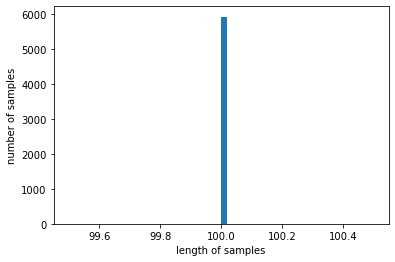

In [30]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train_mean))
print('리뷰의 평균 길이 :',sum(map(len, X_train_mean))/len(X_train_mean))
plt.hist([len(s) for s in X_train_mean], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 모델 구축

In [100]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64,input_shape=(len(X_train_mean), 100),return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(3, activation='softmax'))


In [103]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [107]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=(len(X_train_mean), 100)),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(3)])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 8)                 3488      
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 15        
Total params: 3,539
Trainable params: 3,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential() 
# Sequeatial Model 
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) 
# output = 1

model.compile(loss='mean_squared_error', optimizer='adam')



In [112]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GlobalMaxPool1D, Dropout
model = Sequential()

model.add(Embedding(input_dim=vocab_len, output_dim=64))
model.add(LSTM(32, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 64)          5600448   
_________________________________________________________________
lstm_45 (LSTM)               (None, None, 32)          12416     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 51        
Total params: 5,613,443
Trainable params: 5,613,443
Non-trainable params: 0
___________________________________________

In [114]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train_mean, y_train, epochs=100, callbacks=[mc], batch_size=64, validation_split=0.2)

loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 1.0979 - acc: 0.4125
Epoch 00001: val_acc improved from -inf to 0.45000, saving model to best_model.h5
2/2 [==============================] - 37s 18s/step - loss: 1.0979 - acc: 0.4125 - val_loss: 1.0974 - val_acc: 0.4500
Epoch 2/100
2/2 [==============================] - ETA: 0s - loss: 1.0976 - acc: 0.4250
Epoch 00002: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0976 - acc: 0.4250 - val_loss: 1.0960 - val_acc: 0.4500
Epoch 3/100
2/2 [==============================] - ETA: 0s - loss: 1.0970 - acc: 0.4000
Epoch 00003: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0970 - acc: 0.4000 - val_loss: 1.0950 - val_acc: 0.4500
Epoch 4/100
2/2 [==============================] - ETA: 0s - loss: 1.0963 - acc: 0.4000
Epoch 00004: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0963 -

2/2 [==============================] - ETA: 0s - loss: 1.0893 - acc: 0.4000
Epoch 00033: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0893 - acc: 0.4000 - val_loss: 1.0773 - val_acc: 0.4500
Epoch 34/100
2/2 [==============================] - ETA: 0s - loss: 1.0905 - acc: 0.4000
Epoch 00034: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0905 - acc: 0.4000 - val_loss: 1.0770 - val_acc: 0.4500
Epoch 35/100
2/2 [==============================] - ETA: 0s - loss: 1.0889 - acc: 0.4000
Epoch 00035: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0889 - acc: 0.4000 - val_loss: 1.0766 - val_acc: 0.4500
Epoch 36/100
2/2 [==============================] - ETA: 0s - loss: 1.0882 - acc: 0.4000
Epoch 00036: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0882 - acc: 0.4000 - val_loss: 1.0761 - val_acc: 

2/2 [==============================] - ETA: 0s - loss: 1.0961 - acc: 0.4000
Epoch 00065: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0961 - acc: 0.4000 - val_loss: 1.0742 - val_acc: 0.4500
Epoch 66/100
2/2 [==============================] - ETA: 0s - loss: 1.0865 - acc: 0.4000
Epoch 00066: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 4s/step - loss: 1.0865 - acc: 0.4000 - val_loss: 1.0746 - val_acc: 0.4500
Epoch 67/100
2/2 [==============================] - ETA: 0s - loss: 1.0888 - acc: 0.4000
Epoch 00067: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0888 - acc: 0.4000 - val_loss: 1.0752 - val_acc: 0.4500
Epoch 68/100
2/2 [==============================] - ETA: 0s - loss: 1.0918 - acc: 0.4000
Epoch 00068: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0918 - acc: 0.4000 - val_loss: 1.0757 - val_acc: 

2/2 [==============================] - ETA: 0s - loss: 1.0911 - acc: 0.4000
Epoch 00097: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0911 - acc: 0.4000 - val_loss: 1.0775 - val_acc: 0.4500
Epoch 98/100
2/2 [==============================] - ETA: 0s - loss: 1.0905 - acc: 0.4000
Epoch 00098: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0905 - acc: 0.4000 - val_loss: 1.0775 - val_acc: 0.4500
Epoch 99/100
2/2 [==============================] - ETA: 0s - loss: 1.0885 - acc: 0.4000
Epoch 00099: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0885 - acc: 0.4000 - val_loss: 1.0774 - val_acc: 0.4500
Epoch 100/100
2/2 [==============================] - ETA: 0s - loss: 1.0922 - acc: 0.4000
Epoch 00100: val_acc did not improve from 0.45000
2/2 [==============================] - 7s 3s/step - loss: 1.0922 - acc: 0.4000 - val_loss: 1.0774 - val_acc:

NameError: name 'x_test' is not defined

### 1-D CNN

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model = Sequential()
model.add(Embedding(100, 256))
model.add(Dropout(0.3))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [41]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train_mean, y_train, epochs=100, callbacks=[mc], batch_size=64, validation_split=0.2)

Epoch 1/100


ValueError: in user code:

    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\keras\layers\convolutional.py:247 call
        outputs = self._convolution_op(inputs, self.kernel)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:1010 convolution_v2
        return convolution_internal(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:1140 convolution_internal
        return op(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:574 new_func
        return func(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:574 new_func
        return func(*args, **kwargs)
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:1880 conv1d
        result = gen_nn_ops.conv2d(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py:975 conv2d
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py:742 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\framework\func_graph.py:591 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:3477 _create_op_internal
        ret = Operation(
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1974 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\rlagy\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1815 _create_c_op
        raise ValueError(str(e))

    ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node sequential_2/conv1d_1/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_2/conv1d_1/conv1d/ExpandDims, sequential_2/conv1d_1/conv1d/ExpandDims_1)' with input shapes: [?,1,1,256], [1,3,256,256].


In [124]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test_mean, y_test)[1]))

ValueError: Data cardinality is ambiguous:
  x sizes: 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100
  y sizes: 1974
Please provide data which shares the same first dimension.

In [106]:
preds = loaded_model.predict(X_test)
preds

array([[0.39774117, 0.4180528 , 0.18420602],
       [0.93720895, 0.05255724, 0.01023376],
       [0.53255975, 0.3266842 , 0.14075604],
       ...,
       [0.27636996, 0.466064  , 0.2575661 ],
       [0.2051393 , 0.4949639 , 0.29989678],
       [0.39454758, 0.3854387 , 0.22001368]], dtype=float32)

# 모델 평가 참고 

- https://ayoteralab.tistory.com/entry/Iris-dataset-classification-with-Keras?category=873956

In [29]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['val_loss'])
plt.show()

NameError: name 'history' is not defined

NameError: name 'dataset' is not defined

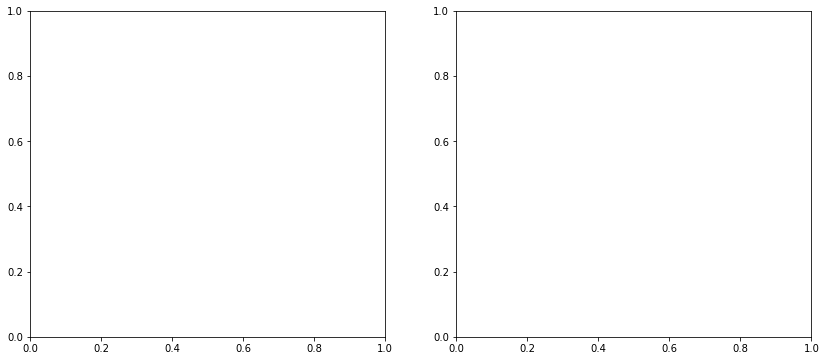

In [108]:
f, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].scatter(dataset.data[:,0], dataset.data[:,1], c=dataset.target)
ax[0].set_title('scatter with Sepal')
ax[1].scatter(dataset.data[:,2], dataset.data[:,3], c=dataset.target)
ax[1].set_title('scatter with Petal')
plt.show()